In [1]:
# Import the dependencies.
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

In [2]:
# Create a set of random latitude and longitude combinations.
lats = np.random.uniform(low=-90.000, high=90.000, size=1500)
lngs = np.random.uniform(low=-180.000, high=180.000, size=1500)
lat_lngs = zip(lats, lngs)
lat_lngs

In [3]:
# Add the latitudes and longitudes to a list.
coordinates = list(lat_lngs)

In [4]:
# Use the print() function to display the latitude and longitude combinations.
for coordinate in coordinates:
    print(coordinate[0], coordinate[1])

78.02407432520823 61.742973180374605
-69.29542068555705 -33.03604942744374
-29.771655520799676 41.88802128967728
-38.61710067624657 -94.64110283140019
1.7522990653388746 37.85567651060845
-85.43029238961576 95.6140811411451
55.85151114078593 -98.24727918281826
17.51050803045706 -87.07794728934029
-48.86446739808769 -42.38103991780801
69.12884406522761 -115.97747833852027
89.2491004886036 -177.67864933819214
73.73630445390222 2.894487668842004
-74.5836820087436 -70.44053985064375
12.420722024215905 -108.34057721443426
-46.1139972694034 26.59411434082105
67.09641158839906 -63.39615980171946
-82.23442880200109 102.73098805029565
36.61462611056655 -27.372440512368854
-18.044481150962923 129.52956387007566
23.130253112098913 -13.658912174339804
-53.21947953179268 30.128670407020138
-9.312046893328954 -70.67471409612172
-47.49641338394578 141.72937275205953
-49.35695656651504 -122.79423276976611
80.34758232962972 -55.64765208400992
47.08648052624693 2.407818542739676
-80.17616225333893 -1.04

-88.41673541698276 -93.72346483147687
67.76138554587916 30.636182016276592
-62.893918242468175 -61.99945698352755
-46.449845945932104 39.44578454135399
-89.06244575528555 -14.216805753745376
-16.464043963109177 -177.55311311885384
5.6291165647140105 50.96302884322887
-47.30325835666666 20.880824182389546
65.32571612695543 -135.70969299821212
62.8213525117593 165.35349119326122
15.66229970086043 -37.354249559616534
-63.36053581825408 -12.11281801120981
-22.090193530274703 -54.698177824043995
-72.4895887641051 -149.98719102959788
29.8898153732886 -92.7324039062239
39.713599846973835 177.12937216499762
-13.708013790022676 -80.14848054987941
-31.915606816311225 56.21786825484847
85.81355899019343 -140.71280221231518
86.86930732834412 110.20685925084388
-19.738825454849362 74.75344749164577
58.84046310324126 112.72030665877651


In [5]:
from citipy import citipy

In [6]:
# Create a list for holding the cities.
cities = []
# Identify the nearest city for each latitude and longitude combination.
for coordinate in coordinates:
    city = citipy.nearest_city(coordinate[0], coordinate[1]).city_name

    # If the city is unique, then we will add it to the cities list.
    if city not in cities:
        cities.append(city)
# Print the city count to confirm sufficient count.
len(cities)

600

In [7]:
# Import the time library and the datetime module from the datetime library 
import time
from datetime import datetime

# Import the requests library.
import requests

# Import the API key.
from config import weather_api_key

#build url
url = "http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=" + weather_api_key

In [8]:
# Create an empty list to hold the weather data.
city_data = []
# Print the beginning of the logging.
print("Beginning Data Retrieval     ")
print("-----------------------------")

# Create counters.
record_count = 1
set_count = 1

# Loop through all the cities in the list.
for i, city in enumerate(cities):

    # Group cities in sets of 50 for logging purposes.
    if (i % 50 == 0 and i >= 50):
        set_count += 1
        record_count = 1
        time.sleep(60)

    # Create endpoint URL with each city.
    city_url = url + "&q=" + city.replace(" ","+")

    # Log the URL, record, and set numbers and the city.
    print(f"Processing Record {record_count} of Set {set_count} | {city}")
    # Add 1 to the record count.
    record_count += 1
    
    # Run an API request for each of the cities.
    try:
        # Parse the JSON and retrieve data.
        city_weather = requests.get(city_url).json()
        # Parse out the needed data.
        city_lat = city_weather["coord"]["lat"]
        city_lng = city_weather["coord"]["lon"]
        city_max_temp = city_weather["main"]["temp_max"]
        city_humidity = city_weather["main"]["humidity"]
        city_clouds = city_weather["clouds"]["all"]
        city_wind = city_weather["wind"]["speed"]
        city_country = city_weather["sys"]["country"]
        # Convert the date to ISO standard.
        city_date = datetime.utcfromtimestamp(city_weather["dt"]).strftime('%Y-%m-%d %H:%M:%S')
        # Append the city information into city_data list.
        city_data.append({"City": city.title(),
                          "Lat": city_lat,
                          "Lng": city_lng,
                          "Max Temp": city_max_temp,
                          "Humidity": city_humidity,
                          "Cloudiness": city_clouds,
                          "Wind Speed": city_wind,
                          "Country": city_country,
                          "Date": city_date})

# If an error is experienced, skip the city.
    except:
        print("City not found. Skipping...")
        pass

# Indicate that Data Loading is complete.
print("-----------------------------")
print("Data Retrieval Complete      ")
print("-----------------------------")

Beginning Data Retrieval     
-----------------------------
Processing Record 1 of Set 1 | amderma
City not found. Skipping...
Processing Record 2 of Set 1 | ushuaia
Processing Record 3 of Set 1 | beloha
Processing Record 4 of Set 1 | lebu
Processing Record 5 of Set 1 | marsabit
Processing Record 6 of Set 1 | albany
Processing Record 7 of Set 1 | thompson
Processing Record 8 of Set 1 | san pedro
Processing Record 9 of Set 1 | mar del plata
Processing Record 10 of Set 1 | yellowknife
Processing Record 11 of Set 1 | mys shmidta
City not found. Skipping...
Processing Record 12 of Set 1 | sorland
Processing Record 13 of Set 1 | san patricio
Processing Record 14 of Set 1 | port elizabeth
Processing Record 15 of Set 1 | pangnirtung
Processing Record 16 of Set 1 | arrifes
Processing Record 17 of Set 1 | kununurra
Processing Record 18 of Set 1 | atar
Processing Record 19 of Set 1 | tarauaca
Processing Record 20 of Set 1 | new norfolk
Processing Record 21 of Set 1 | rikitea
Processing Record 22

Processing Record 36 of Set 4 | iqaluit
Processing Record 37 of Set 4 | gao
Processing Record 38 of Set 4 | gazni
City not found. Skipping...
Processing Record 39 of Set 4 | cabra
Processing Record 40 of Set 4 | oranjestad
Processing Record 41 of Set 4 | mogadishu
Processing Record 42 of Set 4 | hambantota
Processing Record 43 of Set 4 | portland
Processing Record 44 of Set 4 | mimongo
Processing Record 45 of Set 4 | hilo
Processing Record 46 of Set 4 | whitehorse
Processing Record 47 of Set 4 | dingzhou
Processing Record 48 of Set 4 | loveland
Processing Record 49 of Set 4 | sanbu
Processing Record 50 of Set 4 | tungor
Processing Record 1 of Set 5 | newport
Processing Record 2 of Set 5 | coffs harbour
Processing Record 3 of Set 5 | vanimo
Processing Record 4 of Set 5 | bambous virieux
Processing Record 5 of Set 5 | aklavik
Processing Record 6 of Set 5 | chuy
Processing Record 7 of Set 5 | vaitupu
City not found. Skipping...
Processing Record 8 of Set 5 | amahai
Processing Record 9 of 

Processing Record 29 of Set 8 | hervey bay
Processing Record 30 of Set 8 | sawtell
Processing Record 31 of Set 8 | bubaque
Processing Record 32 of Set 8 | chany
Processing Record 33 of Set 8 | comodoro rivadavia
Processing Record 34 of Set 8 | urumqi
Processing Record 35 of Set 8 | laguna
Processing Record 36 of Set 8 | dudinka
Processing Record 37 of Set 8 | roebourne
Processing Record 38 of Set 8 | coruripe
Processing Record 39 of Set 8 | finnsnes
Processing Record 40 of Set 8 | xingyi
Processing Record 41 of Set 8 | bonanza
Processing Record 42 of Set 8 | narasapur
Processing Record 43 of Set 8 | sohag
Processing Record 44 of Set 8 | naryan-mar
Processing Record 45 of Set 8 | waddan
Processing Record 46 of Set 8 | praia da vitoria
Processing Record 47 of Set 8 | nyurba
Processing Record 48 of Set 8 | itarema
Processing Record 49 of Set 8 | ahipara
Processing Record 50 of Set 8 | oskarshamn
Processing Record 1 of Set 9 | seoul
Processing Record 2 of Set 9 | tura
Processing Record 3 o

Processing Record 15 of Set 12 | bafq
Processing Record 16 of Set 12 | kupang
Processing Record 17 of Set 12 | weihai
Processing Record 18 of Set 12 | harwich
Processing Record 19 of Set 12 | huntsville
Processing Record 20 of Set 12 | mana
Processing Record 21 of Set 12 | sungaipenuh
Processing Record 22 of Set 12 | mugumu
Processing Record 23 of Set 12 | mrakovo
Processing Record 24 of Set 12 | xining
Processing Record 25 of Set 12 | akdepe
Processing Record 26 of Set 12 | mahibadhoo
Processing Record 27 of Set 12 | antalaha
Processing Record 28 of Set 12 | okhotsk
Processing Record 29 of Set 12 | harstad
Processing Record 30 of Set 12 | aberdeen
Processing Record 31 of Set 12 | nuevitas
Processing Record 32 of Set 12 | la ronge
Processing Record 33 of Set 12 | anito
Processing Record 34 of Set 12 | pemberton
Processing Record 35 of Set 12 | qui nhon
Processing Record 36 of Set 12 | tarudant
City not found. Skipping...
Processing Record 37 of Set 12 | kruisfontein
Processing Record 3

In [9]:
# Convert the array of dictionaries to a Pandas DataFrame.
city_data_df = pd.DataFrame(city_data)
city_data_df.head(10)

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
0,Ushuaia,-54.8000,-68.3000,47.86,49,0,5.75,AR,2022-10-16 23:41:36
1,Beloha,-25.1667,45.0500,64.63,92,5,1.63,MG,2022-10-16 23:41:37
2,Lebu,-37.6167,-73.6500,51.60,92,73,14.45,CL,2022-10-16 23:41:37
3,Marsabit,2.3284,37.9899,65.80,74,99,17.22,KE,2022-10-16 23:41:37
4,Albany,42.6001,-73.9662,50.52,80,41,1.90,US,2022-10-16 23:40:07
5,Thompson,55.7435,-97.8558,28.56,59,20,6.91,CA,2022-10-16 23:41:38
6,San Pedro,14.3500,121.0167,83.35,85,75,1.14,PH,2022-10-16 23:37:16
7,Mar Del Plata,-38.0023,-57.5575,55.94,89,0,13.00,AR,2022-10-16 23:37:56
8,Yellowknife,62.4560,-114.3525,32.52,86,75,14.97,CA,2022-10-16 23:41:39
9,Sorland,67.6670,12.6934,46.26,78,55,12.48,NO,2022-10-16 23:41:39


In [10]:
#reorder the columns
new_column_order = ["City", "Country", "Date", "Lat", "Lng", "Max Temp", "Humidity", "Cloudiness", "Wind Speed"]
city_data_df = city_data_df[new_column_order]
city_data_df.head(10)

,City,Country,Date,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed
0,Ushuaia,AR,2022-10-16 23:41:36,-54.8000,-68.3000,47.86,49,0,5.75
1,Beloha,MG,2022-10-16 23:41:37,-25.1667,45.0500,64.63,92,5,1.63
2,Lebu,CL,2022-10-16 23:41:37,-37.6167,-73.6500,51.60,92,73,14.45
3,Marsabit,KE,2022-10-16 23:41:37,2.3284,37.9899,65.80,74,99,17.22
4,Albany,US,2022-10-16 23:40:07,42.6001,-73.9662,50.52,80,41,1.90
5,Thompson,CA,2022-10-16 23:41:38,55.7435,-97.8558,28.56,59,20,6.91
6,San Pedro,PH,2022-10-16 23:37:16,14.3500,121.0167,83.35,85,75,1.14
7,Mar Del Plata,AR,2022-10-16 23:37:56,-38.0023,-57.5575,55.94,89,0,13.00
8,Yellowknife,CA,2022-10-16 23:41:39,62.4560,-114.3525,32.52,86,75,14.97
9,Sorland,NO,2022-10-16 23:41:39,67.6670,12.6934,46.26,78,55,12.48


In [11]:
# Create the output file (CSV).
output_data_file = "weather_data/cities.csv"
# Export the City_Data into a CSV.
city_data_df.to_csv(output_data_file, index_label="City_ID")

In [12]:
# Extract relevant fields from the DataFrame for plotting.
lats = city_data_df["Lat"]
max_temps = city_data_df["Max Temp"]
humidity = city_data_df["Humidity"]
cloudiness = city_data_df["Cloudiness"]
wind_speed = city_data_df["Wind Speed"]

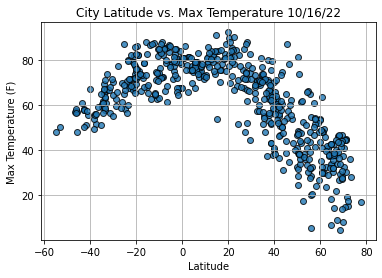

In [13]:
# Import time module
import time

# Build the scatter plot for latitude vs. max temperature.
plt.scatter(lats,
            max_temps,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Max Temperature "+ time.strftime("%x"))
plt.ylabel("Max Temperature (F)")
plt.xlabel("Latitude")
plt.grid(True)

# Save the figure.
plt.savefig("weather_data/Fig1.png")

# Show plot.
plt.show()

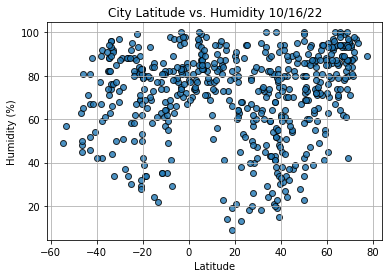

In [14]:
# Build the scatter plots for latitude vs. humidity.
plt.scatter(lats,
            humidity,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Humidity "+ time.strftime("%x"))
plt.ylabel("Humidity (%)")
plt.xlabel("Latitude")
plt.grid(True)
# Save the figure.
plt.savefig("weather_data/Fig2.png")
# Show plot.
plt.show()

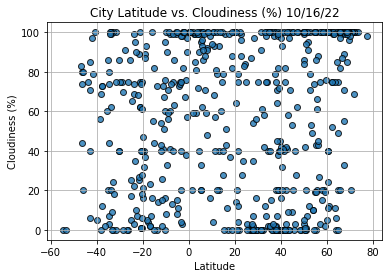

In [15]:
# Build the scatter plots for latitude vs. cloudiness.
plt.scatter(lats,
            cloudiness,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Cloudiness (%) "+ time.strftime("%x"))
plt.ylabel("Cloudiness (%)")
plt.xlabel("Latitude")
plt.grid(True)
# Save the figure.
plt.savefig("weather_data/Fig3.png")
# Show plot.
plt.show()

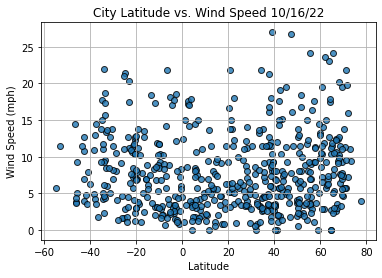

In [16]:
# Build the scatter plots for latitude vs. wind speed.
plt.scatter(lats,
            wind_speed,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Wind Speed "+ time.strftime("%x"))
plt.ylabel("Wind Speed (mph)")
plt.xlabel("Latitude")
plt.grid(True)
# Save the figure.
plt.savefig("weather_data/Fig4.png")
# Show plot.
plt.show()

In [22]:
# Import linregress
from scipy.stats import linregress

# Create a function to create perform linear regression on the weather data
# and plot a regression line and the equation with the data.
def plot_linear_regression(x_values, y_values, title, y_label, text_coordinates):

    # Run regression on hemisphere weather data.
    (slope, intercept, r_value, p_value, std_err) = linregress(x_values, y_values)

    # Calculate the regression line "y values" from the slope and intercept.
    regress_values = x_values * slope + intercept
    # Get the equation of the line.
    line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
    # Create a scatter plot and plot the regression line.
    plt.scatter(x_values,y_values)
    plt.plot(x_values,regress_values,"r")
    # Annotate the text for the line equation.
    plt.annotate(line_eq, text_coordinates, fontsize=15, color="red")
    plt.title(title)
    plt.xlabel('Latitude')
    plt.ylabel(y_label)
    plt.show()

In [28]:
# Create Northern and Southern Hemisphere DataFrames.
northern_hemi_df = city_data_df.loc[(city_data_df["Lat"] >= 0)]
southern_hemi_df = city_data_df.loc[(city_data_df["Lat"] < 0)]

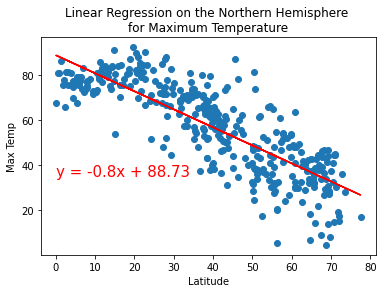

In [57]:
# Linear regression on the Northern Hemisphere
x_values = northern_hemi_df["Lat"]
y_values = northern_hemi_df["Max Temp"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Northern Hemisphere \n'
                        'for Maximum Temperature', 'Max Temp',(0,35))

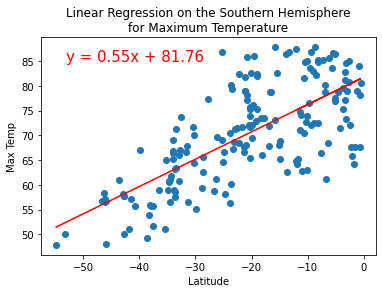

In [58]:
# Linear regression on the Southern Hemisphere
x_values = southern_hemi_df["Lat"]
y_values = southern_hemi_df["Max Temp"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Southern Hemisphere\n'
                        'for Maximum Temperature', 'Max Temp',(-53,85))

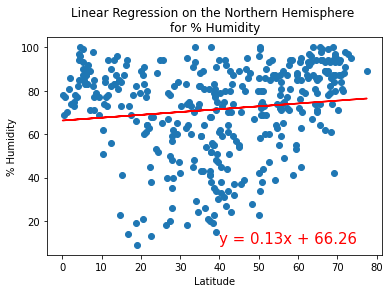

In [59]:
# Linear regression on the Northern Hemisphere
x_values = northern_hemi_df["Lat"]
y_values = northern_hemi_df["Humidity"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Northern Hemisphere \n'
                        'for % Humidity', '% Humidity',(40,10))

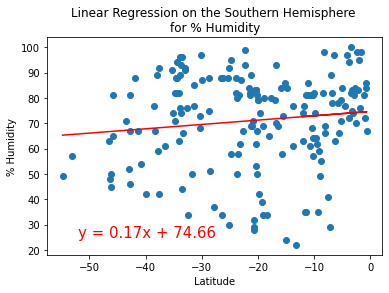

In [60]:
# Linear regression on the Southern Hemisphere
x_values = southern_hemi_df["Lat"]
y_values = southern_hemi_df["Humidity"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Southern Hemisphere \n'
                        'for % Humidity', '% Humidity',(-52,25))

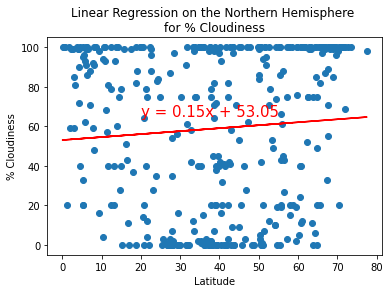

In [64]:
# Linear regression on the Northern Hemisphere (cloudiness)
x_values = northern_hemi_df["Lat"]
y_values = northern_hemi_df["Cloudiness"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Northern Hemisphere \n'
                        'for % Cloudiness', '% Cloudiness',(20,65))

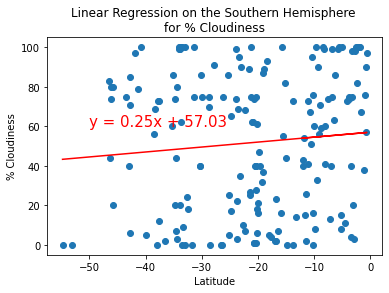

In [67]:
# Linear regression on the Southern Hemisphere
x_values = southern_hemi_df["Lat"]
y_values = southern_hemi_df["Cloudiness"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Southern Hemisphere \n'
                        'for % Cloudiness', '% Cloudiness',(-50,60))

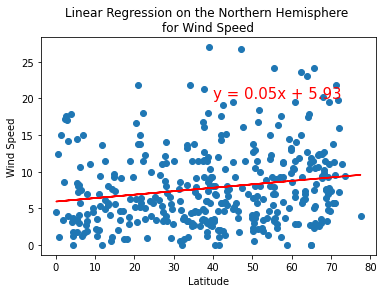

In [70]:
# Linear regression on the Northern Hemisphere
x_values = northern_hemi_df["Lat"]
y_values = northern_hemi_df["Wind Speed"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Northern Hemisphere \n'
                        'for Wind Speed', 'Wind Speed',(40,20))

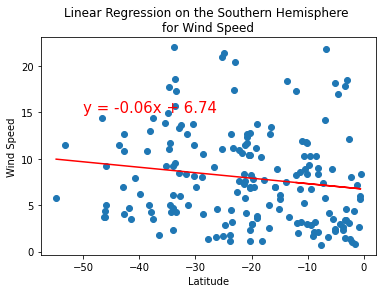

In [73]:
# Linear regression on the Southern Hemisphere
x_values = southern_hemi_df["Lat"]
y_values = southern_hemi_df["Wind Speed"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Southern Hemisphere \n'
                        'for Wind Speed', 'Wind Speed',(-50,15))